### Import Libraries

In [36]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

### Read in data set

In [37]:
#Pandas DataFrame
option_df = pd.read_pickle("option_data.pkl")
option_df.tail()

,Stock,Strike,Time,Volatility,Call Price
812245,198.0,193.757713,0.9,0.35,32.152806
812246,198.0,193.757713,0.9,0.40,35.657525
812247,198.0,193.757713,0.9,0.45,39.160207
812248,198.0,193.757713,0.9,0.50,42.654775
812249,198.0,193.757713,0.9,0.55,46.136680


In [38]:
##Normalize data
option_df['Stock'] = option_df['Stock'].div(option_df.Strike)
option_df['Call Price'] = option_df['Call Price'].div(option_df.Strike)
option_df['Strike'] = 1


In [71]:
option_df.head(10)

,Stock,Strike,Time,Volatility,Call Price
0,1.158462,1,0.1,0.10,0.163449
1,1.158462,1,0.1,0.15,0.163458
2,1.158462,1,0.1,0.20,0.163631
3,1.158462,1,0.1,0.25,0.164330
4,1.158462,1,0.1,0.30,0.165797
5,1.158462,1,0.1,0.35,0.168055
6,1.158462,1,0.1,0.40,0.171020
7,1.158462,1,0.1,0.45,0.174578
8,1.158462,1,0.1,0.50,0.178618
9,1.158462,1,0.1,0.55,0.183051


### Build Keras Model

In [41]:
prices = option_df.values

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras import backend

In [44]:
# Decide split for train and test set

m = 0.8
end = len(prices)
split = int(m*end)
split

649800

In [45]:
## Define X & Y
X_train = prices[:split,:4]
y_train = prices[:split,4:5]
X_test = prices[split:end, :4]
y_test = prices[split:end,4:5]


In [50]:
def custom_activation(x):
    return backend.exp(x)

In [59]:
neurons = 100

model = Sequential()

model.add(Dense(neurons, input_shape=(4,), activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(neurons, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(neurons, activation='relu'))
model.add(Dropout(0.25))


model.add(Dense(neurons, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1))
model.add(Activation(custom_activation))


In [60]:
model.compile(loss='mse',
        optimizer='rmsprop')

In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 100)               500       
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 100)               10100     
__________

In [63]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose = 2)

Train on 584820 samples, validate on 64980 samples
Epoch 1/10
 - 33s - loss: 0.0023 - val_loss: 0.0044
Epoch 2/10
 - 32s - loss: 8.8210e-04 - val_loss: 0.0040
Epoch 3/10
 - 33s - loss: 7.9783e-04 - val_loss: 0.0081
Epoch 4/10
 - 32s - loss: 7.5229e-04 - val_loss: 0.0044
Epoch 5/10
 - 33s - loss: 7.1958e-04 - val_loss: 0.0058
Epoch 6/10
 - 32s - loss: 6.9241e-04 - val_loss: 0.0072
Epoch 7/10
 - 32s - loss: 6.6968e-04 - val_loss: 0.0072
Epoch 8/10
 - 33s - loss: 6.5875e-04 - val_loss: 0.0075
Epoch 9/10
 - 32s - loss: 6.4333e-04 - val_loss: 0.0064
Epoch 10/10
 - 34s - loss: 6.3756e-04 - val_loss: 0.0072


In [64]:
predictions = model.predict(X_train)

Text(0,0.5,'Predicted Price')

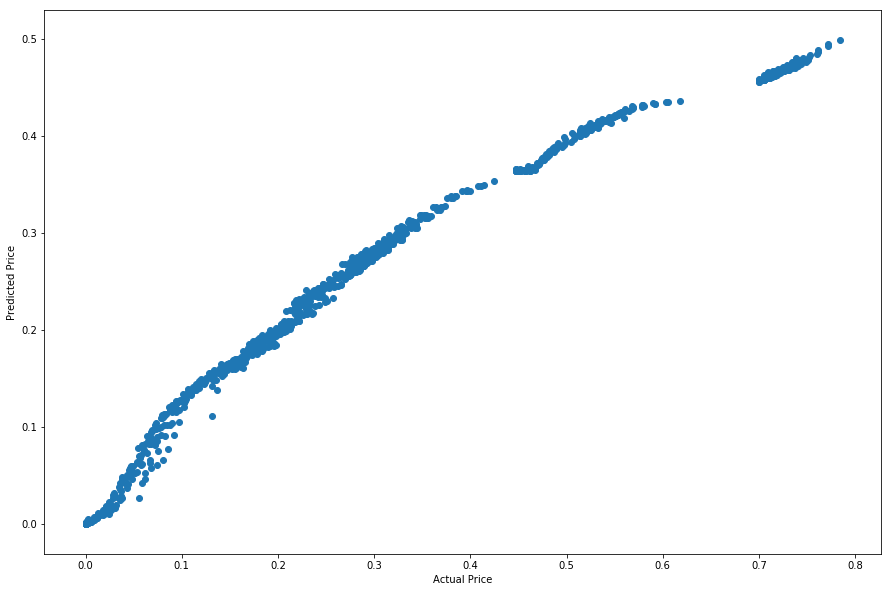

In [74]:
plt.figure(figsize = (15,10))
plt.scatter(y_train[0:1000], predictions[0:1000])
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
